In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

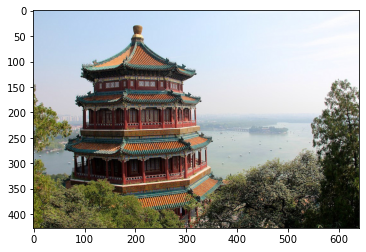

In [3]:
n_colors=64
china=load_sample_image("china.jpg")#image created by code
plt.imshow(china)

In [4]:
china=np.array(china,dtype=np.float64)/255
w,h,d=original_shape=tuple(china.shape)
assert d==3

In [5]:
w*h

273280

In [6]:
image_array=np.reshape(china,(w*h,d))
print("Fitting model on a small sub-sample of the data")
t0=time()
image_array_sample=shuffle(image_array,random_state=0)[:1000]
kmeans=KMeans(n_clusters=n_colors,random_state=0).fit(image_array_sample)
print("done in %0.3fs."%(time()-t0))

Fitting model on a small sub-sample of the data
done in 0.756s.


In [7]:
print("predicting color indices in the full image(k-means)")
t0=time()
labels=kmeans.predict(image_array)
print("done in %0.3fs"%(time()-t0))

predicting color indices in the full image(k-means)
done in 0.024s


In [8]:
codebook_random=shuffle(image_array,random_state=0)[:n_colors]
print("predicting color indices in the full image(random)")
t0=time()
labels_random=pairwise_distances_argmin(codebook_random,image_array,axis=0)
print("done in %0.3fs."%(time()-t0))

predicting color indices in the full image(random)
done in 0.361s.


In [9]:
codebook_random.shape

(64, 3)

In [10]:
def recreate_image(codebook,labels,w,h):
    d=codebook.shape[1]
    image=np.zeros((w,h,d))
    label_idx=0
    for i in range(w):
        for j in range(h):
            image[i][j]=codebook[labels[label_idx]]
            label_idx+=1
    return image

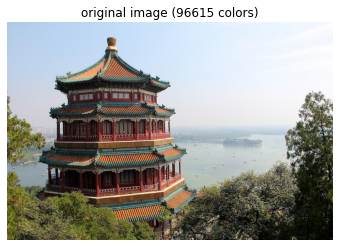

In [11]:
plt.figure(1)
plt.clf(),plt.axis('off')
plt.title('original image (96615 colors)')
plt.imshow(china)

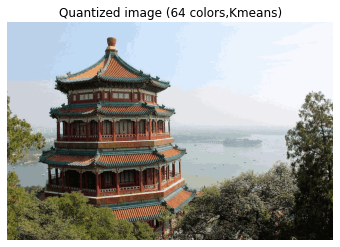

In [12]:
plt.figure(2)
plt.clf(),plt.axis('off')
plt.title('Quantized image (64 colors,Kmeans)')
plt.imshow(recreate_image(kmeans.cluster_centers_,labels,w,h))


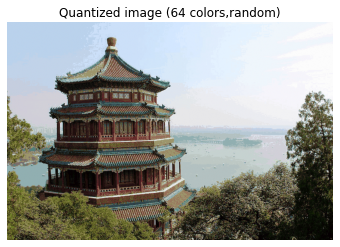

In [13]:
plt.figure(3)
plt.clf(),plt.axis('off')
plt.title('Quantized image (64 colors,random)')
plt.imshow(recreate_image(codebook_random,labels_random,w,h))
